# Introduction

This notebook contains the analysis of weekly snowall in montreal from 2016 to 2022. We will aggregate all the data regarding the snow recovered from the snow removal strategy while comparing the actual snowfall.

In [228]:
import pandas as pd
from pandas.tseries.frequencies import to_offset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")



# Importing Snow recovery data

In [229]:
transaction_2016 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2016-2017.csv", index_col=0)
# transaction_2017 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2017-2018.csv", index_col=0)
transaction_2018 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2018-2019.csv", index_col=0)
transaction_2019 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2019-2020.csv", index_col=0)
transaction_2020 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2020-2021.csv", index_col=0)
transaction_2021 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2021-2022.csv", index_col=0)
transaction_2022 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2022-2023.csv", index_col=0)

C:\Users\paulo\AppData\Local\Temp\ipykernel_45584\2964508961.py:1: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  transaction_2016 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2016-2017.csv", index_col=0)
C:\Users\paulo\AppData\Local\Temp\ipykernel_45584\2964508961.py:3: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  transaction_2018 = pd.read_csv("../data/transaction/transactions_deneigement_saison_2018-2019.csv", index_col=0)


# Preprocessing datasets

## Transaction 2016

In [230]:
transaction_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338809 entries, 375501 to 613543
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DateChargement             338809 non-null  object 
 1   Idenfiantsecteur           319642 non-null  float64
 2   NomSecteur                 319642 non-null  object 
 3   IdentifiantArrondissement  338809 non-null  int64  
 4   ArrondissementCode         338809 non-null  object 
 5   Arrondissement             338809 non-null  object 
 6   IdentifiantDepot           338809 non-null  int64  
 7   NomDepot                   338809 non-null  object 
 8   DateDéchargement           338809 non-null  object 
 9   volume                     338809 non-null  float64
 10  TypeTransaction            338809 non-null  object 
 11  IdentifiantContrat         319642 non-null  float64
 12  NuméroContrat              319642 non-null  object 
dtypes: float64(3), int64(2),

In [231]:
transaction_2016.head()

,DateChargement,Idenfiantsecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDéchargement,volume,TypeTransaction,IdentifiantContrat,NuméroContrat
TransactionID,,,,,,,,,,,,,
375501,2016-12-13 10:45:02,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 10:53:27,59.64,AUT,354.0,SLA-353
375636,2016-12-13 10:58:44,95.0,MTN-303,14,MTN,Montréal-Nord,58,St-Michel - Charland (VSP),2016-12-13 11:06:26,28.76,AUT,327.0,MTN-303
375657,2016-12-13 11:01:01,95.0,MTN-303,14,MTN,Montréal-Nord,58,St-Michel - Charland (VSP),2016-12-13 11:08:59,31.34,AUT,327.0,MTN-303
375778,2016-12-13 11:11:01,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:19:52,59.64,AUT,354.0,SLA-353
375901,2016-12-13 11:26:03,95.0,MTN-303,14,MTN,Montréal-Nord,58,St-Michel - Charland (VSP),2016-12-13 11:33:39,28.76,AUT,327.0,MTN-303


In [232]:
transaction_2016["NomSecteur"] = transaction_2016["NomSecteur"].fillna("NaN")
transaction_2016["NuméroContrat"] = transaction_2016["NuméroContrat"].fillna("NaN")
transaction_2016["IdentifiantContrat"] = transaction_2016["IdentifiantContrat"].fillna(np.nan)
transaction_2016["DateChargement"] = pd.to_datetime(transaction_2016["DateChargement"])
transaction_2016["DateDéchargement"] = pd.to_datetime(transaction_2016["DateDéchargement"])
transaction_2016.sort_values(by="DateDéchargement", inplace=True)


## Transactions 2018

In [233]:
transaction_2018["NomSecteur"] = transaction_2018["NomSecteur"].fillna("NaN")
transaction_2018["NumeroContrat"] = transaction_2018["NumeroContrat"].fillna("NaN")
transaction_2018["IdentifiantContrat"] = transaction_2018["IdentifiantContrat"].fillna(np.nan)
transaction_2018["DateChargement"] = pd.to_datetime(transaction_2018["DateChargement"])
transaction_2018["DateDechargement"] = pd.to_datetime(transaction_2018["DateDechargement"])
transaction_2018.sort_values(by="DateDechargement", inplace=True)


In [234]:
transaction_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349543 entries, 1173318 to 1540791
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DateChargement             349543 non-null  datetime64[ns]
 1   IdenfiantSecteur           327174 non-null  float64       
 2   NomSecteur                 349543 non-null  object        
 3   IdentifiantArrondissement  349543 non-null  int64         
 4   ArrondissementCode         349543 non-null  object        
 5   Arrondissement             349543 non-null  object        
 6   IdentifiantDepot           349543 non-null  int64         
 7   NomDepot                   349543 non-null  object        
 8   DateDechargement           349543 non-null  datetime64[ns]
 9   volume                     349543 non-null  float64       
 10  TypeTransaction            349543 non-null  object        
 11  IdentifiantContrat         327174 non-null  f

## Transactions 2019

In [235]:
transaction_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320395 entries, 1541214 to 1583480
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DateChargement             320395 non-null  object 
 1   IdenfiantSecteur           297552 non-null  float64
 2   NomSecteur                 297552 non-null  object 
 3   IdentifiantArrondissement  320395 non-null  int64  
 4   ArrondissementCode         320395 non-null  object 
 5   Arrondissement             320395 non-null  object 
 6   IdentifiantDepot           320395 non-null  int64  
 7   NomDepot                   320395 non-null  object 
 8   DateDechargement           320395 non-null  object 
 9   volume                     320395 non-null  float64
 10  TypeTransaction            320395 non-null  object 
 11  IdentifiantContrat         297552 non-null  float64
 12  NumeroContrat              297552 non-null  object 
dtypes: float64(3), int64(2

In [236]:
transaction_2019["NomSecteur"] = transaction_2019["NomSecteur"].fillna("NaN")
transaction_2019["NumeroContrat"] = transaction_2019["NumeroContrat"].fillna("NaN")
transaction_2019["IdentifiantContrat"] = transaction_2019["IdentifiantContrat"].fillna(np.nan)
transaction_2019["DateChargement"] = pd.to_datetime(transaction_2019["DateChargement"])
transaction_2019["DateDechargement"] = pd.to_datetime(transaction_2019["DateDechargement"])
transaction_2019.sort_values(by="DateDechargement", inplace=True)


## Transaction 2020

In [237]:
transaction_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251395 entries, 1890152 to 2121301
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DateChargement             251395 non-null  object 
 1   IdenfiantSecteur           234507 non-null  float64
 2   NomSecteur                 234507 non-null  object 
 3   IdentifiantArrondissement  251395 non-null  int64  
 4   ArrondissementCode         251395 non-null  object 
 5   Arrondissement             251395 non-null  object 
 6   IdentifiantDepot           251395 non-null  int64  
 7   NomDepot                   251395 non-null  object 
 8   DateDechargement           251395 non-null  object 
 9   volume                     251395 non-null  float64
 10  TypeTransaction            251395 non-null  object 
 11  IdentifiantContrat         234507 non-null  float64
 12  NumeroContrat              234507 non-null  object 
dtypes: float64(3), int64(2

In [238]:
transaction_2020["NomSecteur"] = transaction_2020["NomSecteur"].fillna("NaN")
transaction_2020["NumeroContrat"] = transaction_2020["NumeroContrat"].fillna("NaN")
transaction_2020["IdentifiantContrat"] = transaction_2020["IdentifiantContrat"].fillna(np.nan)
transaction_2020["DateChargement"] = pd.to_datetime(transaction_2020["DateChargement"])
transaction_2020["DateDechargement"] = pd.to_datetime(transaction_2020["DateDechargement"])
transaction_2020.sort_values(by="DateDechargement", inplace=True)


## Transactions 2021

In [239]:
transaction_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260680 entries, 2150929 to 2204491
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DateChargement             260680 non-null  object 
 1   IdenfiantSecteur           242089 non-null  float64
 2   NomSecteur                 242089 non-null  object 
 3   IdentifiantArrondissement  260680 non-null  int64  
 4   ArrondissementCode         260680 non-null  object 
 5   Arrondissement             260680 non-null  object 
 6   IdentifiantDepot           260680 non-null  int64  
 7   NomDepot                   260680 non-null  object 
 8   DateDechargement           260680 non-null  object 
 9   volume                     260680 non-null  float64
 10  TypeTransaction            260680 non-null  object 
 11  IdentifiantContrat         242089 non-null  float64
 12  NumeroContrat              242089 non-null  object 
dtypes: float64(3), int64(2

In [240]:
transaction_2021["NomSecteur"] = transaction_2021["NomSecteur"].fillna("NaN")
transaction_2021["NumeroContrat"] = transaction_2021["NumeroContrat"].fillna("NaN")
transaction_2021["IdentifiantContrat"] = transaction_2021["IdentifiantContrat"].fillna(np.nan)
transaction_2021["DateChargement"] = pd.to_datetime(transaction_2021["DateChargement"])
transaction_2021["DateDechargement"] = pd.to_datetime(transaction_2021["DateDechargement"])
transaction_2021.sort_values(by="DateDechargement", inplace=True)


## Transactions 2022

In [241]:
transaction_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286468 entries, 2424823 to 2693557
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DateChargement             286468 non-null  object 
 1   IdenfiantSecteur           264257 non-null  float64
 2   NomSecteur                 264257 non-null  object 
 3   IdentifiantArrondissement  286468 non-null  int64  
 4   ArrondissementCode         286468 non-null  object 
 5   Arrondissement             286468 non-null  object 
 6   IdentifiantDepot           286468 non-null  int64  
 7   NomDepot                   286468 non-null  object 
 8   DateDechargement           286468 non-null  object 
 9   volume                     286468 non-null  float64
 10  TypeTransaction            286468 non-null  object 
 11  IdentifiantContrat         264257 non-null  float64
 12  NumeroContrat              264257 non-null  object 
dtypes: float64(3), int64(2

In [242]:
transaction_2022["NomSecteur"] = transaction_2022["NomSecteur"].fillna("NaN")
transaction_2022["NumeroContrat"] = transaction_2022["NumeroContrat"].fillna("NaN")
transaction_2022["IdentifiantContrat"] = transaction_2022["IdentifiantContrat"].fillna(np.nan)
transaction_2022["DateChargement"] = pd.to_datetime(transaction_2022["DateChargement"])
transaction_2022["DateDechargement"] = pd.to_datetime(transaction_2022["DateDechargement"])
transaction_2022.sort_values(by="DateDechargement", inplace=True)

# Resampling Volumes by Week

In [243]:
def year_month_date_to_string(date):
    return date.strftime('%Y%m')

def resample(df, index):
    d = df.set_index(index)
    return d.resample('1T', kind='timestamp').bfill()

def datetime_attributes(df, column, attribute=['year', 'month', 'day', 'hour', 'dayofyear', 'quarter']):
    # define generator expression of series, one for each attribute
    date_gen = (getattr(df[column].dt, i).rename(i) for i in attribute)
    return pd.concat(date_gen, axis=1)

def datetime_isocalendar(df, column, attribute=['year','week', 'weekday']):
    date_gen =  df.apply(lambda x: x[column].isocalendar(), axis=1, result_type='expand')
    return date_gen.rename(columns= dict((i,j) for i,j in enumerate(attribute)) )


transaction_2016_weeks = pd.merge(transaction_2016, datetime_isocalendar(transaction_2016, "DateDéchargement"), on="TransactionID")
# transaction_2017_weeks = pd.merge(transaction_2017, datetime_isocalendar(transaction_2017, "DateDechargement"), on="TransactionID")
transaction_2018_weeks = pd.merge(transaction_2018, datetime_isocalendar(transaction_2018, "DateDechargement"), on="TransactionID")
transaction_2019_weeks = pd.merge(transaction_2019, datetime_isocalendar(transaction_2019, "DateDechargement"), on="TransactionID")
transaction_2020_weeks = pd.merge(transaction_2020, datetime_isocalendar(transaction_2020, "DateDechargement"), on="TransactionID")
transaction_2021_weeks = pd.merge(transaction_2021, datetime_isocalendar(transaction_2021, "DateDechargement"), on="TransactionID")
transaction_2022_weeks = pd.merge(transaction_2022, datetime_isocalendar(transaction_2022, "DateDechargement"), on="TransactionID")



In [244]:
transaction_2022_weeks

,DateChargement,IdenfiantSecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDechargement,volume,TypeTransaction,IdentifiantContrat,NumeroContrat,year,week,weekday
TransactionID,,,,,,,,,,,,,,,,
2497698,2022-08-18 18:50:00,162.0,SLA-62S,13,SLA,Saint-Laurent,49,Thimens (SLA),2022-08-18 18:50:00,29.21,N-AUT,1217.0,SLA-372,2022,33,4
2497697,2022-08-18 18:50:00,162.0,SLA-62S,13,SLA,Saint-Laurent,49,Thimens (SLA),2022-08-18 18:50:00,29.21,N-AUT,1217.0,SLA-372,2022,33,4
2475433,2022-12-18 04:11:08,83.0,LAC-104,15,LAC,Lachine,55,Saint-Pierre (LAC),2022-12-18 04:11:08,28.57,N-AUT,1148.0,LAC-104,2022,50,7
2424820,1969-12-31 19:00:00,83.0,LAC-104,15,LAC,Lachine,55,Saint-Pierre (LAC),2022-12-18 04:25:31,25.27,AUT,1148.0,LAC-104,2022,50,7
2424821,1969-12-31 19:00:00,83.0,LAC-104,15,LAC,Lachine,55,Saint-Pierre (LAC),2022-12-18 04:27:56,25.85,AUT,1148.0,LAC-104,2022,50,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724553,2023-02-15 11:11:26,NaN,NaN,17,RDP,R.D.P. / P.A.T.,45,Armand-Chaput (RDP),2023-02-15 11:11:26,30.00,BARCODE,NaN,NaN,2023,7,3
2724554,2023-02-15 11:11:39,NaN,NaN,17,RDP,R.D.P. / P.A.T.,45,Armand-Chaput (RDP),2023-02-15 11:11:39,30.00,BARCODE,NaN,NaN,2023,7,3
2724556,2023-02-15 11:14:45,NaN,NaN,17,RDP,R.D.P. / P.A.T.,45,Armand-Chaput (RDP),2023-02-15 11:14:45,30.00,BARCODE,NaN,NaN,2023,7,3


In [245]:
def adjust_week_number(dataframe, year_1, year_2):
    if year_1 == 2016:
        date_column_name = "DateDéchargement"
    else:
        date_column_name = "DateDechargement"
    dataframe = dataframe[(dataframe[date_column_name] >= f"{year_1}-11-01") & (dataframe[date_column_name] <= f"{year_2}-04-30")]
    first_year_earliest_week = dataframe[dataframe["year"] == year_1]["week"].min()
    first_year_last_week = dataframe[dataframe["year"] == year_1]["week"].max()
    # dataframe["weeks_adjusted"] = adjust_week(dataframe, year_1, year_2, first_year_earliest_week)
    dataframe["weeks_adjusted"] = adjust_week(dataframe, year_1, year_2, first_year_earliest_week, first_year_last_week)
    return dataframe

def adjust_week(dataframe, year_1, year_2, first_year_earliest_week, first_year_last_week):
    series = []
    min_week_year1 = first_year_earliest_week
    for i, row in dataframe.iterrows():
        if row["year"] == year_1:
            series.append(row["week"] - 44)
        else:
            series.append(row["week"] + 8)

    return series
transaction_2016_weeks = adjust_week_number(transaction_2016_weeks, 2016, 2017)
# transaction_2017_weeks = adjust_week_number(transaction_2017_weeks, 2017, 2018)
transaction_2018_weeks = adjust_week_number(transaction_2018_weeks, 2018, 2019)
transaction_2019_weeks = adjust_week_number(transaction_2019_weeks, 2019, 2020)
transaction_2020_weeks = adjust_week_number(transaction_2020_weeks, 2020, 2021)
transaction_2021_weeks = adjust_week_number(transaction_2021_weeks, 2021, 2022)
transaction_2022_weeks = adjust_week_number(transaction_2022_weeks, 2022, 2023)

C:\Users\paulo\AppData\Local\Temp\ipykernel_45584\2396925901.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["weeks_adjusted"] = adjust_week(dataframe, year_1, year_2, first_year_earliest_week, first_year_last_week)
C:\Users\paulo\AppData\Local\Temp\ipykernel_45584\2396925901.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["weeks_adjusted"] = adjust_week(dataframe, year_1, year_2, first_year_earliest_week, first_year_last_week)
C:\Users\paulo\AppData\Local\Temp\ipykernel_45584\

In [246]:
transaction_2019_weeks["weeks_adjusted"]

TransactionID
1541052     2
1541083     2
1541084     2
1557715     2
1541085     2
           ..
1876219    20
1876220    20
1876221    20
1876222    20
1876223    20
Name: weeks_adjusted, Length: 320395, dtype: int64

In [247]:
transaction_2016_weeks = transaction_2016_weeks.groupby(by="weeks_adjusted")["volume"].sum()
# transaction_2017_weeks = transaction_2017_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2018_weeks = transaction_2018_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2019_weeks = transaction_2019_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2020_weeks = transaction_2020_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2021_weeks = transaction_2021_weeks.groupby(by="weeks_adjusted")["volume"].sum()
transaction_2022_weeks = transaction_2022_weeks.groupby(by="weeks_adjusted")["volume"].sum()

In [248]:
transaction_2018_weeks

weeks_adjusted
3        1196.92
4        2427.47
5        3509.07
6        2820.55
7         684.84
8        2355.00
9      382947.87
10    1409682.54
11      54402.41
12    3334623.44
13    1445708.95
14     487912.80
15    2788855.73
16    2027743.43
17     375293.97
18     100858.80
19    1502050.45
20     111853.94
21       5718.20
Name: volume, dtype: float64

# Generating Lineplots for snow

In [249]:
transaction_2021_weekly

DateDechargement
11-08         31.11
11-15          0.00
11-22          3.00
11-29          0.00
12-06     668558.19
12-13       2921.00
12-20       7788.00
12-27          0.00
01-03      13591.67
01-10      17738.74
01-17    3192991.16
01-24     166089.54
01-31     398127.16
02-07     907267.18
02-14     557572.68
02-21    2791199.02
02-28    1600839.04
03-07      57435.15
03-14      33856.63
03-21      12964.50
03-28         76.40
04-04          0.00
04-11          0.00
year        2021.00
dtype: float64

In [250]:
snowfall_years = [
    transaction_2016_weeks, transaction_2018_weeks,
    transaction_2019_weeks, transaction_2020_weeks,
    transaction_2021_weeks, transaction_2022_weeks,
]
complete_average_snowfall = pd.concat(snowfall_years, axis=1, join="outer").mean(axis=1)
order = [
    '11-08',
    '11-15',
    '11-22',
    '11-29',
    '12-06',
    '12-13',
    '12-20',
    '12-27',
    '01-03',
    '01-10',
    '01-17',
    '01-24',
    '01-31',
    '02-07',
    '02-14',
    '02-21',
    '02-28',
    '03-06',
    '03-07',
    '03-13',
    '03-14',
    '03-20',
    '03-21',
    '03-28',
    '04-04',
    '04-11',
]
# complete_average_snowfall = complete_average_snowfall.loc[order]
complete_average_snowfall = complete_average_snowfall.sort_index()
complete_average_snowfall

weeks_adjusted
1     3.111000e+01
2     5.794910e+05
3     5.764253e+03
4     3.375026e+03
5     1.682111e+05
6     2.417272e+05
7     3.365124e+05
8     3.811218e+05
9     9.501184e+05
10    4.592145e+05
11    1.552072e+06
12    1.215476e+06
13    1.447430e+06
14    6.855047e+05
15    2.245090e+06
16    1.153301e+06
17    5.614855e+05
18    1.025028e+05
19    9.904964e+05
20    2.557285e+05
21    6.148073e+03
22    2.795000e+03
23    8.889250e+02
dtype: float64

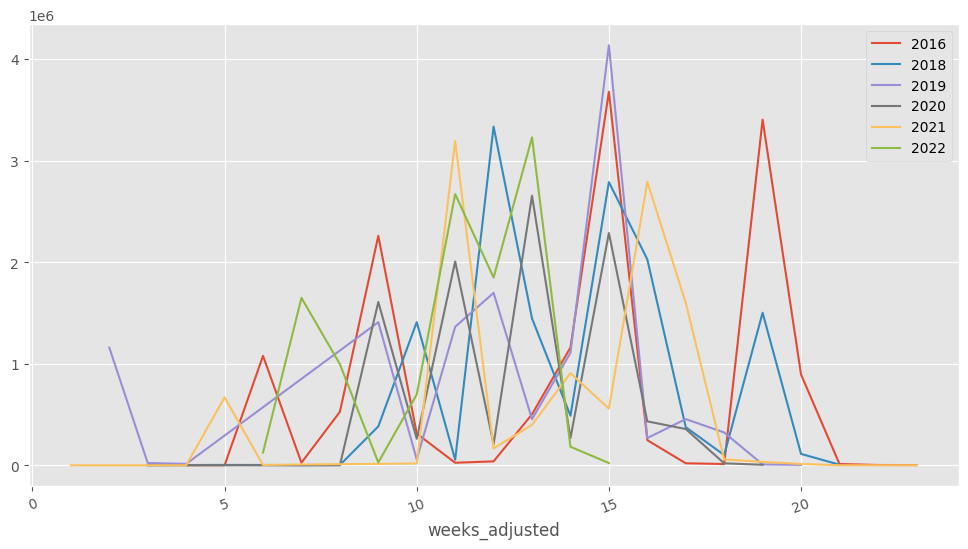

In [251]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=transaction_2016_weeks.index, y=transaction_2016_weeks.values, label="2016")
sns.lineplot(x=transaction_2018_weeks.index, y=transaction_2018_weeks.values, label="2018")
sns.lineplot(x=transaction_2019_weeks.index, y=transaction_2019_weeks.values, label="2019")
sns.lineplot(x=transaction_2020_weeks.index, y=transaction_2020_weeks.values, label="2020")
sns.lineplot(x=transaction_2021_weeks.index, y=transaction_2021_weeks.values, label="2021")
sns.lineplot(x=transaction_2022_weeks.index, y=transaction_2022_weeks.values, label="2022")
# plt.yscale("log")
plt.xticks(rotation=20)
plt.show()

In [252]:
transaction_2019_weekly.reset_index()

,DateDechargement,0
0,11-15,1158982.03
1,11-22,21818.09
2,11-29,13639.66
3,12-06,0.00
4,12-13,0.00
5,12-20,0.00
6,12-27,0.00
7,01-03,1408916.12
8,01-10,57856.61
9,01-17,1363518.69


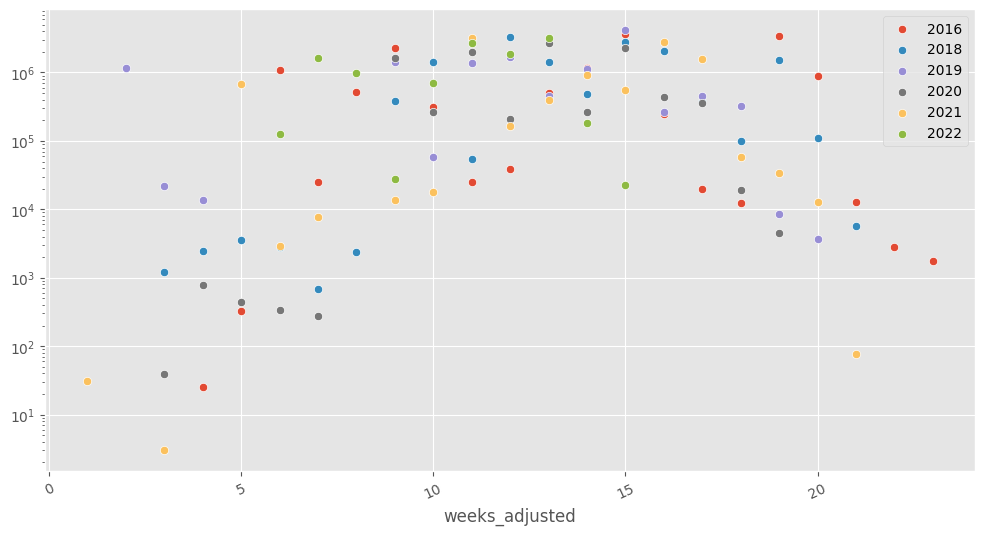

In [253]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=transaction_2016_weeks.index, y=transaction_2016_weeks.values, label="2016")
sns.scatterplot(x=transaction_2018_weeks.index, y=transaction_2018_weeks.values, label="2018")
sns.scatterplot(x=transaction_2019_weeks.index, y=transaction_2019_weeks.values, label="2019")
sns.scatterplot(x=transaction_2020_weeks.index, y=transaction_2020_weeks.values, label="2020")
sns.scatterplot(x=transaction_2021_weeks.index, y=transaction_2021_weeks.values, label="2021")
sns.scatterplot(x=transaction_2022_weeks.index, y=transaction_2022_weeks.values, label="2022")
plt.yscale("log")
plt.xticks(rotation=25)
plt.show()

In [254]:
# plt.figure(figsize=(12, 6))
# transaction_2016_weekly["year"] = 2016
# transaction_2018_weekly["year"] = 2018
# transaction_2019_weekly["year"] = 2019
# transaction_2020_weekly["year"] = 2020
# transaction_2021_weekly["year"] = 2021
# transaction_2022_weekly["year"] = 2022
# concatenated_snow_removal = pd.concat([
#     transaction_2016_weekly, transaction_2018_weekly,
#     transaction_2019_weekly, transaction_2020_weekly,
#     transaction_2022_weekly, transaction_2016_weekly], axis=0)
# sns.barplot(x=concatenated_snow_removal.reset_index().index, y=transaction_2016_weekly, label="2016")

# plt.xticks(rotation=25)
# plt.show()

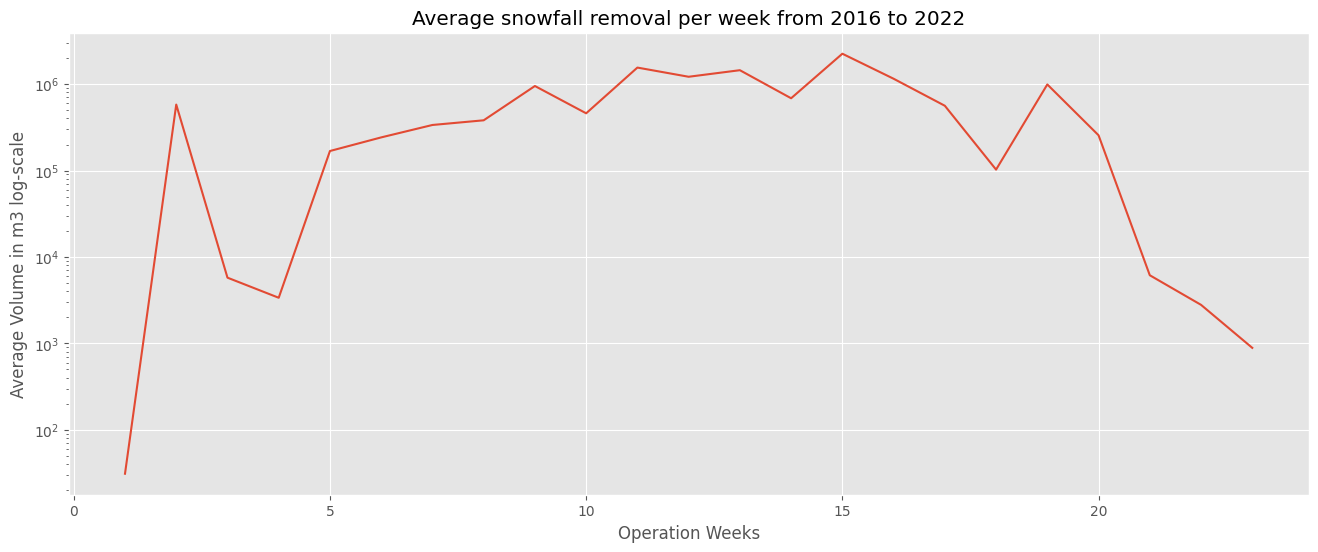

In [255]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=complete_average_snowfall.index, y=complete_average_snowfall.values)
plt.title("Average snowfall removal per week from 2016 to 2022")
plt.xlabel("Operation Weeks")
plt.ylabel("Average Volume in m3 log-scale")
# plt.xticks(rotation=20)
plt.yscale("log")
plt.show()

how to calculate the snow data? we have data in mm

In [256]:
complete_average_snowfall

weeks_adjusted
1     3.111000e+01
2     5.794910e+05
3     5.764253e+03
4     3.375026e+03
5     1.682111e+05
6     2.417272e+05
7     3.365124e+05
8     3.811218e+05
9     9.501184e+05
10    4.592145e+05
11    1.552072e+06
12    1.215476e+06
13    1.447430e+06
14    6.855047e+05
15    2.245090e+06
16    1.153301e+06
17    5.614855e+05
18    1.025028e+05
19    9.904964e+05
20    2.557285e+05
21    6.148073e+03
22    2.795000e+03
23    8.889250e+02
dtype: float64